In [2]:
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Python/module versions used here for reference
print('Python: ', sys.version)
print('Matplotlib: ', mpl.__version__)
print('Pandas: ', pd.__version__)
print('Seaborn: ', sns.__version__)

Python:  3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Matplotlib:  3.1.0
Pandas:  0.24.2
Seaborn:  0.9.0


## Pandas & Seaborn

[Pandas](https://pandas.pydata.org/) is a Python library for data analysis with easy-to-use data structures, mostly commonly tables of data called _data frames_. [Seaborn](https://seaborn.pydata.org/) is a Python library that provides a high-level interface for producing statistical graphics. Here 'high-level' means we can produce graphics with only a few lines of code that specify the type of graphic, instead of building it ourselves from with the more basic plotting tools provided by matplotlib.

Used together Pandas and Seaborn allow us to quickly explore, visualise and understand a dataset. The key to this workflow is to wrangle the data into a dataframe in [Tidy Format](https://seaborn.pydata.org/introduction.html#organizing-datasets). Put simply Tidy Format is a table where:

1. Each variable is represented by a column - e.g. "passes per 90".
2. Each observation/record forms a row - e.g. rows are different players.

For this notebook we provide an example dataframe for player passing data stored as a .csv file in Tidy Format. This data was prepared using the [Wyscout](https://wyscout.com/) API for a subset of leagues and resampled with replacement. This means that it does not represent real match data but maintains a similar distribution. Player and team names are anonymised.

### Tidy data in Pandas

First let's load the data with pandas and look at the first few rows.

In [8]:
df = pd.read_csv('../data/pass_stats.csv', index_col=0)
df.head()

,teamId,position,longPassesP90,longPassesAccPC,shortPassesP90,shortPassesAccPC,forwardPassesP90,forwardPassesAccPC,backwardPassesP90,backwardPassesAccPC,keyPassesP90
playerId,,,,,,,,,,,
0,48,rw,4.193361,33.125000,17.979033,78.279883,16.668608,52.201258,17.533489,71.898356,0.629004
1,74,rw,2.052821,21.052632,12.641056,79.487179,9.075630,26.190476,15.990396,67.567568,0.756303
2,26,gk,1.773098,72.413793,5.013587,100.000000,8.987772,93.877551,0.366848,100.000000,0.061141
3,50,rcb,5.086436,61.176471,15.857713,88.301887,19.627660,74.085366,7.539894,89.682540,0.000000
4,68,lb,7.367933,41.886792,14.652456,84.819734,19.267841,53.823954,9.091752,81.345566,0.166821


This is data in Tidy Format - each row represents a player (indexed by a playerId) and the different columns contain information such as position or statistics about proficiency in different kinds of pass. Many Pandas functions are designed to work on data in this format which means we can now quickly explore the dataset.

For example, we can derive **summary statistics** such as the mean long pass accuracy:

In [9]:
#Computing the mean long pass accuracy for all players
df.longPassesAccPC.mean()

51.038191266020746

We can also **filter** the dataset based on values in specific columns, for example by position. Note that `~` here is used as negation.

In [10]:
#Filter for goalkeepers
df_gk = df[df.position=='gk']
#Filter for outfield players
df_of = df[~(df.position=='gk')]

#Compute the mean long pass accuracy for goalkeepers
gk_lpa = df_gk.longPassesAccPC.mean()
#Compute the mean long pass accuracy for outfield players
of_lpa = df_of.longPassesAccPC.mean()

print(gk_lpa, of_lpa)

76.84345331567046 49.17923399988484


So the average long pass accuracy for a goalkeeper is better than for an outfield player. This may not be an exciting result but it's not bad for a few lines of code. 

We can also **sort the data** by the values in the different columns. Note that this does not result in `df` being sorted after it is called, instead it returns a new dataframe that is a sorted version of `df`. 

In [11]:
df.sort_values(by='longPassesP90', ascending=False).head(5)

,teamId,position,longPassesP90,longPassesAccPC,shortPassesP90,shortPassesAccPC,forwardPassesP90,forwardPassesAccPC,backwardPassesP90,backwardPassesAccPC,keyPassesP90
playerId,,,,,,,,,,,
588,89,lcb3,12.365439,39.175258,26.643059,77.033493,34.674221,55.882353,10.070822,70.886076,0.000000
1033,15,rcb3,11.119942,56.725146,53.388728,96.224117,40.057803,81.006494,26.986994,95.180723,0.260116
1488,104,rcb3,11.061180,49.559471,28.408230,88.765009,33.451543,67.880554,10.817542,89.414414,0.170547
478,80,lcb,10.949094,56.028369,14.598792,91.489362,21.820535,67.793594,8.503020,89.954338,0.038827
1088,43,rcb,10.854801,65.048544,10.327869,84.693878,19.496487,65.945946,5.374707,88.235294,0.000000


Player 588 at team 89 tops the ranking for long passes p90, but his accuracy (39%) is well below average. 

Finally, in Tidy Format we can **combine columns** quickly to compute new statistics. For example, in this dataset every pass is characterised as either short or long so we can compute the total passes p90 by adding the two columns together.

In [7]:
#Create a new column as the sum of two others
df['passesP90'] = df.shortPassesP90 + df.longPassesP90
#View team, position and passesP90 for the first 5 rows of the table
df[['teamId', 'position', 'passesP90']].head(5)

,teamId,position,passesP90
playerId,,,
0,48,rw,22.172394
1,74,rw,14.693878
2,26,gk,6.786685
3,50,rcb,20.944149
4,68,lb,22.020389


### Tidy data in Seaborn
Seaborn can quickly create graphics such as scatterplots, histograms and density plots by providing a dataframe and the associated column names for the values to plot. For example, we can check the relationship between short passes p90 and long passes p90 with a single line of code

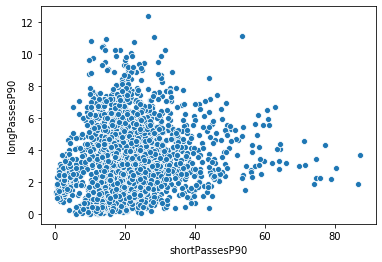

In [67]:
#Produces a scatter plot of the 'shortPassesP90' columns against the 'longPassesP90' in df
sns.scatterplot(data=df, x='shortPassesP90', y='longPassesP90');

Additional properties for plot can be associated with different columns of the dataframe. For example, we can highlight goalkeepers in the above scatterplot by setting a different marker.

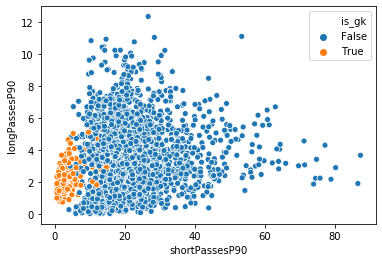

In [68]:
#Create a new Boolean column which is 1 for goalkeepers and 0 for outfield players
df['is_gk'] = (df.position == 'gk')
#Create the scatter plot highlighting the goalkeepers
sns.scatterplot(data=df, x='shortPassesP90', y='longPassesP90', hue='is_gk');

[Many plots](https://seaborn.pydata.org/examples/index.html) can be produced using this basic pattern, for example swarmplots to compare the long passing accuracy of goalkeepers to outfield players

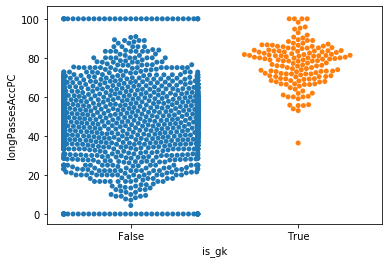

In [172]:
sns.swarmplot(data=df, x='is_gk', y='longPassesAccPC');

This works well for the goalkeepers but it looks like there's too many outfield players to really get a sense for the distribution as they bunch up and overlap along the left and right. In this case, it might be better to use a [violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html) which gives a builds a density estimate instead of plotting all of the points. Fortunately, changing between swamplots, violinplots and boxplots is as easy as changing one line of code (see below).

### Customising plots with matplotlib
These seaborn graphics provide a quick way to explore the data but aren't polished enough for publication. Because seaborn is built using matplotlib we can tweak the seaborn figures easily by using matplotlib methods. For example, we can specify the size, alter the axis labels or add custom elements to the plot. 

Below we build a more complex graphic showing how a given player's pass accuracy compares to others by combining violinplots, swamplots and matplotlib plotting. (Note that here we specify colours such as `xkcd:pale red`. Matplotlib recognises this format for any colour in the [xkcd colour survery](https://xkcd.com/color/rgb/). This is a useful tool for finding good plot colours and remembering them by name.)

In [177]:
#First we extract the data on a given player of interest
p_interest = df.loc[2085]
spa, fpa, lpa = p_interest[['shortPassesAccPC', 'longPassesAccPC', 'forwardPassesAccPC']]

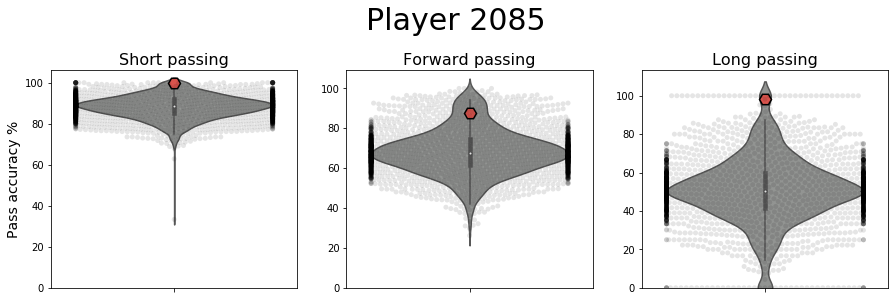

In [178]:
#initialise a 15x4 figure 
plt.figure(figsize=(15,4))

#Add a subplot to the figure as the first in a 3x1 layout
ax = plt.subplot(131)

#Use seaborn to add a violin plot to the ax object by provinding it to the seaborn method (ax=ax)
sns.violinplot(ax=ax, data=df, y='shortPassesAccPC', color='xkcd:grey')
# On put black markers at 10% opacity on top of the violin
sns.swarmplot(ax=ax, data=df, y='shortPassesAccPC', color='k', alpha=0.1)
#Highlight the player of interest with a red hexagon outlined in black.
plt.plot([0], [spa], marker='H', ms=12, c='xkcd:pale red',  markeredgewidth=1.5, markeredgecolor='k')

#Customise the matplotlib style
ax.set_ylim(0,)
ax.set_title('Short passing', size=16)
ax.set_ylabel('Pass accuracy %', size=14)

#The same for forward passes
ax = plt.subplot(132)
sns.violinplot(ax=ax, data=df, y='forwardPassesAccPC', color='xkcd:grey')
sns.swarmplot(ax=ax, data=df, y='forwardPassesAccPC', color='k', alpha=0.1)
plt.plot([0], [fpa], marker='H', ms=12, c='xkcd:pale red',  markeredgewidth=1.5, markeredgecolor='k')

ax.set_ylim(0,)
ax.set_title('Forward passing', size=16)
ax.set_ylabel('')

#The same for long passes
ax = plt.subplot(133)
sns.violinplot(ax=ax, data=df, y='longPassesAccPC', color='xkcd:grey')
sns.swarmplot(ax=ax, data=df, y='longPassesAccPC', color='k', alpha=0.1)
plt.plot([0], [lpa], marker='H', ms=12, c='xkcd:pale red',  markeredgewidth=1.5, markeredgecolor='k')
ax.set_ylim(0,)
ax.set_title('Long passing', size=16)
ax.set_ylabel('');

#Add a title for the full figure (use the y parameter to move this title up)
plt.suptitle('Player 2085', size=30, y=1.1);